In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

pd.options.mode.chained_assignment = None

from sklearn.metrics import confusion_matrix, classification_report

In [2]:
root_dir = '/scratch3-shared/phil/berzelius_non_grit_based/' # user should change this path
bf_file = 'bf_11cls_basic_aug_dmsonorm_750e_sgd/ResNet_resnet50/analysis.csv'
fl_file = 'fl_11cls_basic_aug_dmso_norm_750e_sgd/ResNet_resnet50/analysis.csv'
cp_file = 'bf_11cls_basic_aug_dmsonorm_750e_sgd/ResNet_resnet50/cp_moa_analysis.csv'

for split in range(1, 6):
    bf_split = pd.read_csv(root_dir + 'bf_exps_1_split' + str(split) + '/' + bf_file, index_col=0)
    bf_split['split'] = np.repeat(split, len(bf_split))
    
    fl_split = pd.read_csv(root_dir + 'fl_exps_1_split' + str(split) + '/' + fl_file, index_col=0)
    fl_split['split'] = np.repeat(split, len(fl_split))
    
    cp_split = pd.read_csv(root_dir + 'bf_exps_1_split' + str(split) + '/' + cp_file, index_col=0)
    cp_split['split'] = np.repeat(split, len(cp_split))
    
    if split == 1:
        bf_df = bf_split
        fl_df = fl_split
        cp_df = cp_split
    else:
        bf_df = pd.concat([bf_df, bf_split], ignore_index=True, sort=False)
        fl_df = pd.concat([fl_df, fl_split], ignore_index=True, sort=False)
        cp_df = pd.concat([cp_df, cp_split], ignore_index=True, sort=False)

bf_confusion_matX = confusion_matrix(bf_df['moa'], bf_df['pred_moa'])
fl_confusion_matX = confusion_matrix(fl_df['moa'], fl_df['pred_moa'])

new_order = [0, 1, 2, 3, 4, 5, 7, 8, 9, 10, 6]
bf_confusion_mat = [[bf_confusion_matX[i][j] for j in new_order] for i in new_order]
fl_confusion_mat = [[fl_confusion_matX[i][j] for j in new_order] for i in new_order]

moas = sorted(bf_df['moa'].unique())
moas11 = moas.copy()

bf_file = 'bf_10cls_basic_aug_dmsonorm_750e_sgd/ResNet_resnet50/analysis.csv'
fl_file = 'fl_10cls_basic_aug_dmso_norm_750e_sgd/ResNet_resnet50/analysis.csv'

for split in range(1, 6):
    bf_split = pd.read_csv(root_dir + 'bf_exps_1_split' + str(split) + '/' + bf_file, index_col=0)
    bf_split['split'] = np.repeat(split, len(bf_split))
    
    fl_split = pd.read_csv(root_dir + 'fl_exps_1_split' + str(split) + '/' + fl_file, index_col=0)
    fl_split['split'] = np.repeat(split, len(fl_split))
    
    if split == 1:
        bf_df = bf_split
        fl_df = fl_split
    else:
        bf_df = pd.concat([bf_df, bf_split], ignore_index=True, sort=False)
        fl_df = pd.concat([fl_df, fl_split], ignore_index=True, sort=False)

bf_confusion_mat10 = confusion_matrix(bf_df['moa'], bf_df['pred_moa'])
fl_confusion_mat10 = confusion_matrix(fl_df['moa'], fl_df['pred_moa'])

moas = sorted(bf_df['moa'].unique())
moas10 = moas.copy()

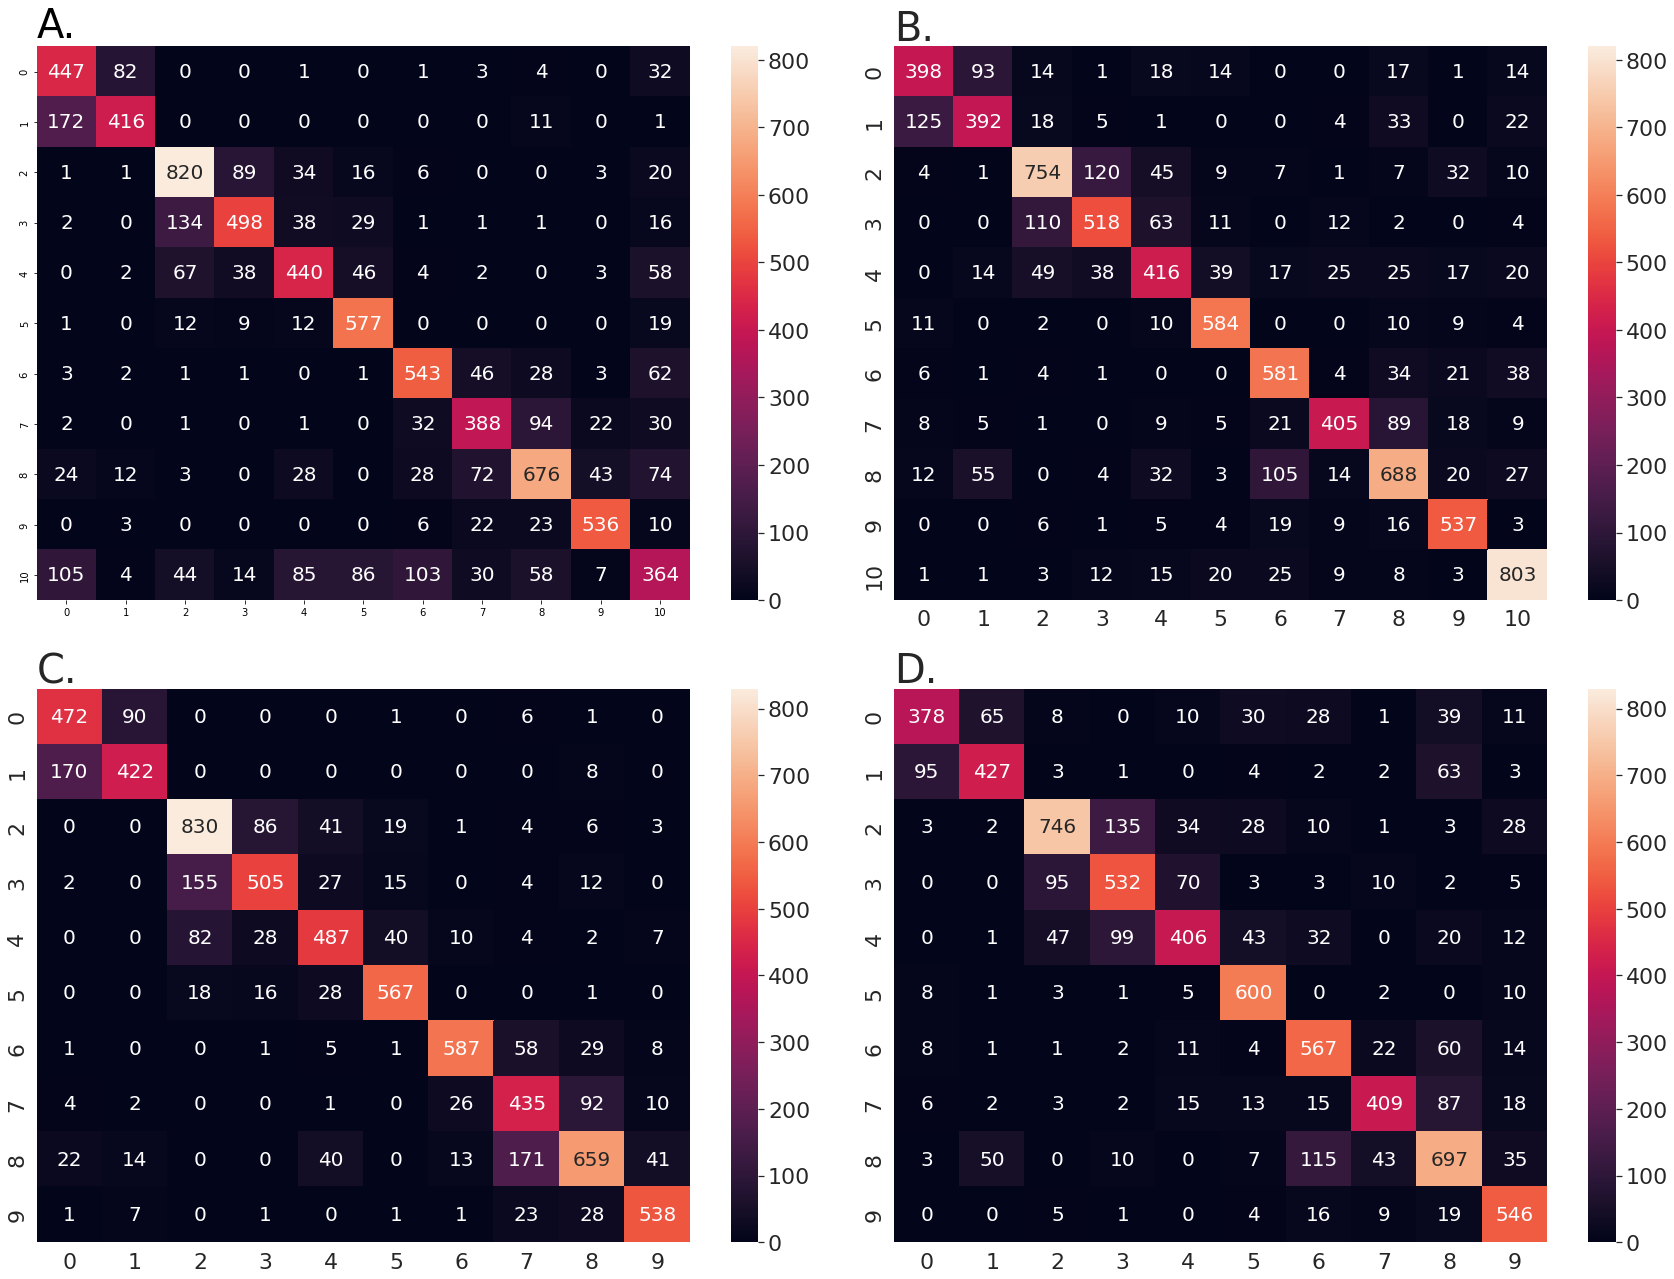

In [3]:
fig = plt.figure(figsize=(30,22))
heat_max = np.max([np.max(bf_confusion_mat), np.max(fl_confusion_mat)])

ax = fig.add_subplot(221)
df_cm = pd.DataFrame(bf_confusion_mat, index = range(len(moas11)),
                     columns = range(len(moas11)))
sn.set(font_scale=2) # for label size
sn.heatmap(df_cm, annot=True, fmt='d', annot_kws={"size": 20}, vmax=heat_max) # font size
ax.set_title('A.', loc='left', fontsize=40)
sn.set(font_scale=2)

ax = fig.add_subplot(222)
df_cm = pd.DataFrame(fl_confusion_mat, index = range(len(moas11)),
                     columns = range(len(moas11)))
sn.set(font_scale=2)
sn.heatmap(df_cm, annot=True, fmt='d', annot_kws={"size": 20},vmax=heat_max) # font size
ax.set_title('B.', loc='left', fontsize=40)

heat_max = np.max([np.max(bf_confusion_mat10), np.max(fl_confusion_mat10)])

ax = fig.add_subplot(223)
df_cm = pd.DataFrame(bf_confusion_mat10, index = range(len(moas10)),
                     columns = range(len(moas10)))
sn.set(font_scale=2) # for label size
sn.heatmap(df_cm, annot=True, fmt='d', annot_kws={"size": 20}, vmax=heat_max) # font size
ax.set_title('C.', loc='left', fontsize=40)

ax = fig.add_subplot(224)
df_cm = pd.DataFrame(fl_confusion_mat10, index = range(len(moas10)),
                     columns = range(len(moas10)))
sn.set(font_scale=2)
sn.heatmap(df_cm, annot=True, fmt='d', annot_kws={"size": 20},vmax=heat_max) # font size
ax.set_title('D.', loc='left', fontsize=40)

plt.subplots_adjust(wspace=0.05, hspace=0.16)

plt.savefig('combined_cms.png', bbox_inches='tight', format='png')

plt.show()
plt.close()

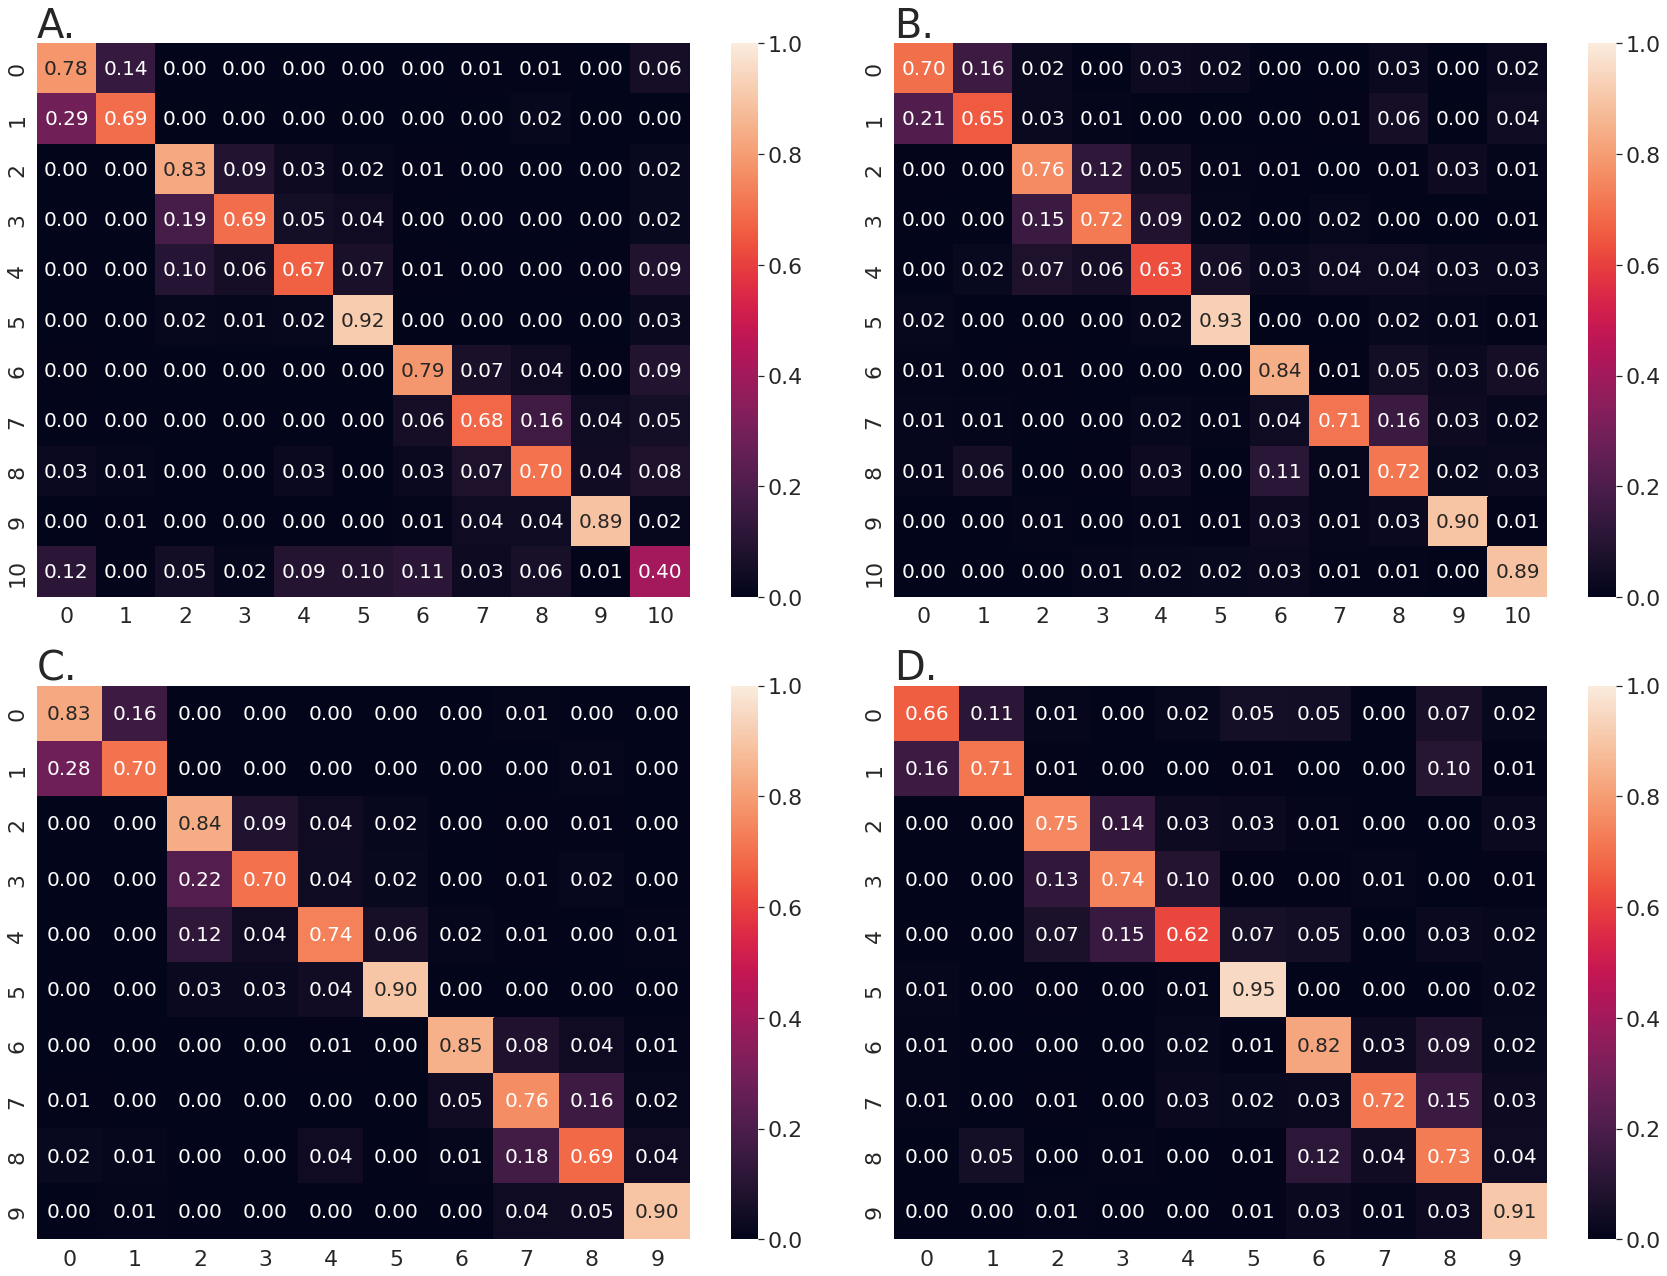

In [4]:
# normalized confusion matrices

fig = plt.figure(figsize=(30,22))
heat_max = np.max([np.max(bf_confusion_mat), np.max(fl_confusion_mat)])

ax = fig.add_subplot(221)
df_cm = pd.DataFrame(bf_confusion_mat, index = range(len(moas11)),
                     columns = range(len(moas11)))

df_cm = df_cm.to_numpy()
df_cm = df_cm.astype('float') / df_cm.sum(axis=1)[:, np.newaxis]
df_cm = pd.DataFrame(df_cm, index = range(len(moas11)),
                     columns = range(len(moas11)))

sn.set(font_scale=2) # for label size
sn.heatmap(df_cm, annot=True, fmt='.2f', annot_kws={"size": 20}, vmax=1)
ax.set_title('A.', loc='left', fontsize=40)
sn.set(font_scale=2)

ax = fig.add_subplot(222)
df_cm = pd.DataFrame(fl_confusion_mat, index = range(len(moas11)),
                     columns = range(len(moas11)))

df_cm = df_cm.to_numpy()
df_cm = df_cm.astype('float') / df_cm.sum(axis=1)[:, np.newaxis]
df_cm = pd.DataFrame(df_cm, index = range(len(moas11)),
                     columns = range(len(moas11)))

sn.set(font_scale=2)
sn.heatmap(df_cm, annot=True, fmt='.2f', annot_kws={"size": 20},vmax=1)
ax.set_title('B.', loc='left', fontsize=40)

heat_max = np.max([np.max(bf_confusion_mat10), np.max(fl_confusion_mat10)])

ax = fig.add_subplot(223)
df_cm = pd.DataFrame(bf_confusion_mat10, index = range(len(moas10)),
                     columns = range(len(moas10)))

df_cm = df_cm.to_numpy()
df_cm = df_cm.astype('float') / df_cm.sum(axis=1)[:, np.newaxis]
df_cm = pd.DataFrame(df_cm, index = range(len(moas10)),
                     columns = range(len(moas10)))

sn.set(font_scale=2) # for label size
sn.heatmap(df_cm, annot=True, fmt='.2f', annot_kws={"size": 20}, vmax=1)
ax.set_title('C.', loc='left', fontsize=40)

ax = fig.add_subplot(224)
df_cm = pd.DataFrame(fl_confusion_mat10, index = range(len(moas10)),
                     columns = range(len(moas10)))

df_cm = df_cm.to_numpy()
df_cm = df_cm.astype('float') / df_cm.sum(axis=1)[:, np.newaxis]
df_cm = pd.DataFrame(df_cm, index = range(len(moas10)),
                     columns = range(len(moas10)))

sn.set(font_scale=2)
sn.heatmap(df_cm, annot=True, fmt='.2f', annot_kws={"size": 20},vmax=1)
ax.set_title('D.', loc='left', fontsize=40)

plt.subplots_adjust(wspace=0.05, hspace=0.16)

plt.savefig('combined_cms_normalized.png', bbox_inches='tight', format='png')

plt.show()
plt.close()

In [5]:
# classification reports

# back compute y_true and y_pred from confusion matrix
y_true = []
y_pred = []

for i in range(len(moas11)):
    for j in range(len(moas11)):
        y_true.append([i for _ in range(bf_confusion_matX[i,j])])
        y_pred.append([j for _ in range(bf_confusion_matX[i,j])])
        
y_true = sum(y_true, [])
y_pred = sum(y_pred, [])

print('BF 11c')
print(classification_report(y_true, y_pred, target_names=moas11, digits=3))

y_true = []
y_pred = []

for i in range(len(moas11)):
    for j in range(len(moas11)):
        y_true.append([i for _ in range(fl_confusion_matX[i,j])])
        y_pred.append([j for _ in range(fl_confusion_matX[i,j])])
        
y_true = sum(y_true, [])
y_pred = sum(y_pred, [])

print('FL 11c')
print(classification_report(y_true, y_pred, target_names=moas11, digits=3))

y_true = []
y_pred = []

for i in range(len(moas10)):
    for j in range(len(moas10)):
        y_true.append([i for _ in range(bf_confusion_mat10[i,j])])
        y_pred.append([j for _ in range(bf_confusion_mat10[i,j])])
        
y_true = sum(y_true, [])
y_pred = sum(y_pred, [])

print('BF 10c')
print(classification_report(y_true, y_pred, target_names=moas10, digits=3))

y_true = []
y_pred = []

for i in range(len(moas10)):
    for j in range(len(moas10)):
        y_true.append([i for _ in range(fl_confusion_mat10[i,j])])
        y_pred.append([j for _ in range(fl_confusion_mat10[i,j])])
        
y_true = sum(y_true, [])
y_pred = sum(y_pred, [])

print('FL 10c')
print(classification_report(y_true, y_pred, target_names=moas10, digits=3))

BF 11c
                                  precision    recall  f1-score   support

                ATPase inhibitor      0.590     0.784     0.674       570
         Aurora kinase inhibitor      0.797     0.693     0.742       600
                  HDAC inhibitor      0.758     0.828     0.792       990
                   HSP inhibitor      0.767     0.692     0.728       720
                   JAK inhibitor      0.689     0.667     0.677       660
                  PARP inhibitor      0.764     0.916     0.833       630
                            dmso      0.531     0.404     0.459       900
     protein synthesis inhibitor      0.750     0.787     0.768       690
       retinoid receptor agonist      0.688     0.681     0.684       570
         topoisomerase inhibitor      0.755     0.704     0.729       960
tubulin polymerization inhibitor      0.869     0.893     0.881       600

                        accuracy                          0.723      7890
                       macro 